In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, root

# Part 1:

### Because of the rotating frame of reference:
### $ \sum a = a_g + a_{cf}+ a_{cor} $

### From Angular Velocity + Kepler's Law:
### $ \omega = \frac{2\pi}{P} \Rightarrow \omega^2 = \frac{4\pi^2}{P^2} = \frac{G(M_1+M_2)}{|R_1-R_2|^3}$

### From Netwon's Law of Gravitation:
### $ a_g = -\frac{GM_1}{|r-R_1|^3}(r-R_1) -\frac{GM_2}{|r-R_2|^3}(r-R_2) $

### Centrifugal:
### $ a_{cf} = \omega^2r = \frac{G(M_1+M_2)}{|R_1-R_2|^3}r$

### Coriolis:
### $ a_{cor} = -2\omega x\dot{r} $

### Constraints for Lagrange equilibrium points: 
### $ F = 0 \Rightarrow a = 0 $
### $ \dot{r} = 0$

### $ \Rightarrow -\frac{GM_1}{|r-R_1|^3}(r-R_1) - \frac{GM_2}{|r-R_2|^3}(r-R_2) + \frac{G(M_1+M_2)}{|R_1-R_2|^3}r = 0 $ 

### $ \Rightarrow \frac{M_1}{|r-R_1|^3}(r-R_1) + \frac{M_2}{|r-R_2|^3}(r-R_2) - \frac{(M_1+M_2)}{|R_1-R_2|^3}r = 0 $ 
### $ \Rightarrow F(r) = \begin{bmatrix} \frac{M_1}{|r-R_1|^3}(x-r_1) + \frac{M_2}{|r-R_2|^3}(x-r_2) - \frac{(M_1+M_2)}{|R_1-R_2|^3}x \\ \frac{M_1}{|r-R_1|^3}y + \frac{M_2}{|r-R_2|^3}y - \frac{(M_1+M_2)}{|R_1-R_2|^3}y  \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$ 

### Simple case: r is on the x-axis: $ y = 0 $ 

### $ \Rightarrow F(r) = \begin{bmatrix} \frac{M_1}{|r-R_1|^3}(x-r_1) + \frac{M_2}{|r-R_2|^3}(x-r_2) - \frac{(M_1+M_2)}{|R_1-R_2|^3}x \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix} $

### $\equiv f(x) = \frac{M_1}{|x-r_1|^3}(x-r_1) + \frac{M_2}{|x-r_2|^3}(x-r_2) - \frac{(M_1+M_2)}{|r_1-r_2|^3}x = 0$

### $ \Rightarrow f'(x) = -\dfrac{2M_2}{\left(x-r_2\right)^2\left|x-r_2\right|}-\dfrac{2M_1}{\left(x-r_1\right)^2\left|x-r_1\right|}-\dfrac{M_2+M_1}{\left(r_2-r_1\right)^2\left|r_2-r_1\right|} $

In [2]:
M1_kg = 1.989e30 # Sun mass in kg
M2_kg = 1.898e27 # Jupiter mass in kg

# Mass in terms of milliJupiter masses (aid in numerical stablity)
M1 = M1_kg / M2_kg * 1000 
M2 = M2_kg / M2_kg * 1000

R = 747.73 # Distance between Sun and Jupiter in Gm

# Distances from center of mass to the respective mass
a = M2/(M1+M2)
b = M1/(M1+M2)

r1 = -a * R
r2 =  b * R


In [3]:
def f(x):
    # Contribution due to gravition
    F1 = M1/(abs(x-r1) * (x-r1))
    F2 = M2/(abs(x-r2) * (x-r2))
    
    # Centrifugal contribution
    Fc = (M1 + M2)/((r1-r2)**2 * abs(r1-r2)) * x

    return F1 + F2 - Fc
    

In [4]:
def f1(x):
    # Contribution due to gravition
    F1 = 2*M1/((x-r1)**2 * abs(x-r1))
    F2 = 2*M2/((x-r2)**2 * abs(x-r2))
    
    # Centrifugal contribution
    Fc = (M1 + M2)/((r1-r2)**2 * abs(r1-r2))

    return -Fc - F1 - F2
    

# Part 2a

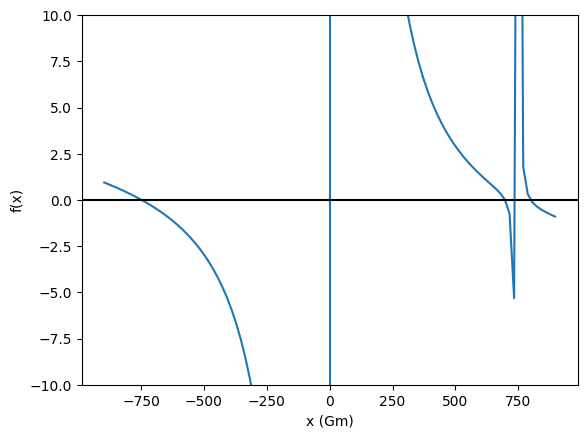

In [46]:
x = np.linspace(-1.2*r2, 1.2*r2, 100)
y = f(x)
plt.plot(x, y)
plt.axhline(c="k")
plt.ylim(-10, 10)


plt.xlabel("x (Gm)")
plt.ylabel("f(x)")

plt.savefig("part2a.png")
plt.show()



# Part 3

In [6]:
# define Newton's Method for finding roots
def newton(f, f1, x_n, tol=1e-6):
    while abs(f(x_n)) > tol:
        x_n = x_n - f(x_n)/f1(x_n)
    return x_n


In [7]:
l1 = newton(f, f1, .9*r2)

In [8]:
l2 = newton(f, f1, 1.1*r2)

In [9]:
l3 = newton(f, f1, -r2)

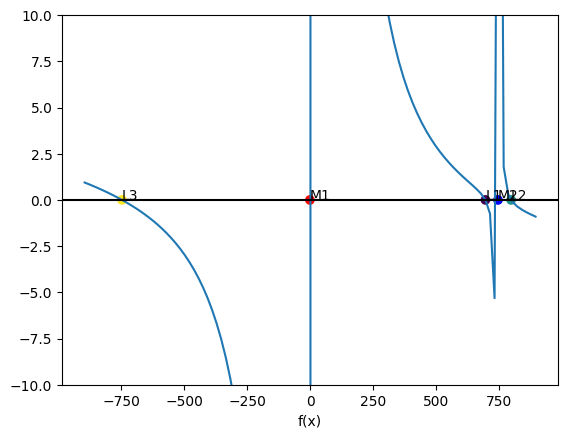

In [44]:
x = np.linspace(-1.2*r2, 1.2*r2, 100)
y = f(x)
plt.plot(x, y)
plt.axhline(c="k")
plt.ylim(-10, 10)


r_x = [r1, r2]
r_y = [0] * len(r_x)

plt.scatter(r_x, r_y, c=["r", "b"])

l_x = [l1, l2, l3]
l_y = [0] * len(l_x)

plt.scatter(l_x, l_y, c=range(len(l_x)))

plt.annotate("M1", (r1, 0))
plt.annotate("M2", (r2, 0))

plt.annotate("L1", (l1, 0))
plt.annotate("L2", (l2, 0))
plt.annotate("L3", (l3, 0))

plt.show()

# Part 4

### General Case:
### $ F(r) = \begin{bmatrix} \frac{M_1}{|r-R_1|^3}(x-r_1) + \frac{M_2}{|r-R_2|^3}(x-r_2) - \frac{(M_1+M_2)}{|R_1-R_2|^3}x \\ \frac{M_1}{|r-R_1|^3}y + \frac{M_2}{|r-R_2|^3}y - \frac{(M_1+M_2)}{|R_1-R_2|^3}y  \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$ 

### $ \Rightarrow J(r) = \begin{bmatrix} 
\frac{M_1}{|r-R_1|^3} - 3\frac{M_1}{|r-R_1|^5}(x-r_1)^2 - 3\frac{M_2}{|r-R_2|^5}(x-r_2)^2 + \frac{M_2}{|r-R_2|^3} - \frac{(M_1+M_2)}{|R_1-R_2|^3} & 
-3\frac{M_1}{|r-R_1|^5}(x-r_1)y - 3\frac{M_2}{|r-R_2|^5}(x-r_2)y \\ 
-3\frac{M_1}{|r-R_1|^5}(x-r_1)y - 3\frac{M_2}{|r-R_2|^5}(x-r_2)y & 
\frac{M_1}{|r-R_1|^3} - 3\frac{M_1}{|r-R_1|^5}y^2 - 3\frac{M_2}{|r-R_2|^5}y^2 + \frac{M_2}{|r-R_2|^3} - \frac{(M_1+M_2)}{|R_1-R_2|^3} 
\end{bmatrix}$ 

In [11]:
R1 = np.array([-a * R, 0])
R2 = np.array([b * R, 0])

In [12]:
# Multidimensional Function
def F(r):    
    # Contribution due to gravition
    F1 = M1/np.linalg.norm(r-R1)**3 * (r - R1)
    F2 = M2/np.linalg.norm(r-R2)**3 * (r - R2)
    
    # Centrifugal contribution
    Fc = (M1 + M2)/np.linalg.norm(R1-R2)**3 * r

    return F1 + F2 - Fc

In [13]:
# Jacobian for F(r)
def J(r):
    x, y = r

    # df1/dx
    df1_dx = M1/np.linalg.norm(r-R1)**3
    df1_dx -= 3*M1*(x-r1)**2/np.linalg.norm(r-R1)**5
    df1_dx += M2/np.linalg.norm(r-R2)**3
    df1_dx -= 3*M2*(x-r2)**2/np.linalg.norm(r-R2)**5
    df1_dx -= (M1 + M2)/np.linalg.norm(R1-R2)**3

    # df1/dy
    df1_dy = -3*M1*(x-r1)*y/np.linalg.norm(r-R1)**5
    df1_dy -= 3*M2*(x-r2)*y/np.linalg.norm(r-R2)**5

    # df2/dx 
    df2_dx = df1_dy

    # df2_dy
    df2_dy = M1/np.linalg.norm(r-R1)**3
    df2_dy -= 3*M1*y**2/np.linalg.norm(r-R1)**5
    df2_dy += M2/np.linalg.norm(r-R2)**3
    df2_dy -= 3*M2*y**2/np.linalg.norm(r-R2)**5
    df2_dy -= (M1 + M2)/np.linalg.norm(R1-R2)**3

    return np.array([
        [df1_dx, df1_dy],
        [df2_dx, df2_dy]
    ])
    

### Part 2b

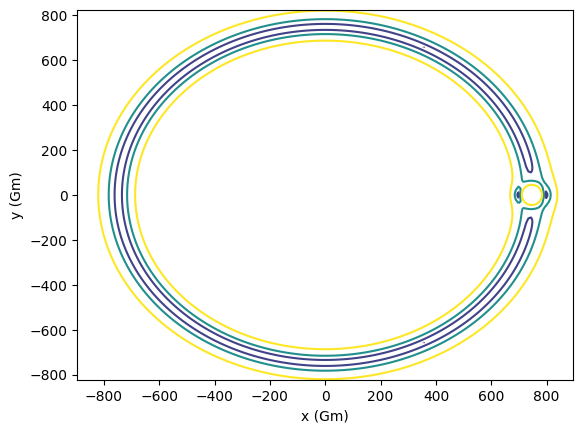

In [47]:
x1 = np.linspace(-1.2*r2, 1.2*r2, 200)
x2 = np.linspace(-1.1*R, 1.1*R, 200)
X, Y = np.meshgrid(x1, x2)
Z = np.zeros_like(X)

for i in range(len(x1)):
    for j in range(len(x2)):
        Z[i, j] = np.linalg.norm(F(np.array([X[i, j], Y[i, j]])))

plt.contour(X, Y, Z, levels=[0.0005, 0.1, 0.25, 0.5])

plt.xlabel("x (Gm)")
plt.ylabel("y (Gm)")

plt.savefig("part2b.png")
plt.show()

In [15]:
# define Newton's Method for multidimension finding roots
def newtonMD(F, J, x_n, tol=1e-6):
    while np.linalg.norm(F(x_n)) > tol:
        x_n = x_n - np.linalg.inv(J(x_n)) @ F(x_n)
    return x_n
    

In [109]:
x0 = np.array([.9*r2, 0])
L1 = newtonMD(F, J, x0)
L1

array([697.16725946,   0.        ])

In [110]:
x0 = np.array([1.1*r2, 0])
L2 = newtonMD(F, J, x0)
L2

array([799.18702677,   0.        ])

In [111]:
x0 = np.array([-r2, 0])
L3 = newtonMD(F, J, x0)
L3

array([-748.02701659,    0.        ])

In [112]:
x0 = np.array([(r1+r2)/2, R])
L4 = newtonMD(F, J, x0)
L4

array([373.25077667, 647.49626908])

In [113]:
x0 = np.array([(r1+r2)/2, -R])
L5 = newtonMD(F, J, x0)
L5

array([ 373.25077667, -647.49626908])

In [114]:
t1 = np.array([R*(1-(a/3)**(1/3)), 0])
e1 = np.linalg.norm(L1 - t1)
print(e1, e1/np.linalg.norm(t1)*100)

0.46270277046846786 0.06641305357098462


In [115]:
t2 = np.array([R*(1+(a/3)**(1/3)), 0])
e2 = np.linalg.norm(L2 - t2)
print(e2, e2/np.linalg.norm(t2)*100)

0.4315834593787713 0.05403198976551615


In [116]:
t3 = np.array([-R*(1+5/12*a), 0])
e3 = np.linalg.norm(L3 - t3)
print(e3, e3/np.linalg.norm(t3)*100)

3.772913714783499e-08 5.043820117349683e-09


In [117]:
t4 = np.array([R/2 * (M1-M2)/(M1+M2), np.sqrt(3)/2 * R])
e4 = np.linalg.norm(L4 - t4)
print(e4, e4/np.linalg.norm(t4)*100)

0.11385750892878074 0.015234345062014262


In [118]:
t5 = np.array([R/2 * (M1-M2)/(M1+M2), -np.sqrt(3)/2 * R])
e5 = np.linalg.norm(L5 - t5)
print(e4, e5/np.linalg.norm(t5)*100)

0.11385750892878074 0.015234345062014262


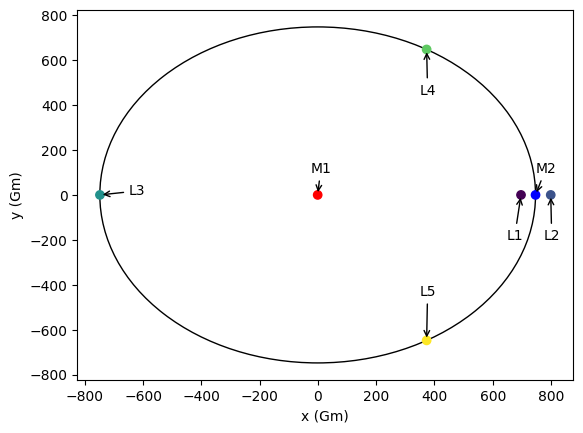

In [87]:
# x1 = np.linspace(-1.2*r2, 1.2*r2, 200)
# x2 = np.linspace(-1.1*R, 1.1*R, 200)
# X, Y = np.meshgrid(x1, x2)
# Z = np.zeros_like(X)

# for i in range(len(x1)):
#     for j in range(len(x2)):
#         Z[i, j] = np.linalg.norm(F(np.array([X[i, j], Y[i, j]])))

# plt.contour(X, Y, Z, levels=[0.0005, 0.1, 0.25, 0.5])

orbit = plt.Circle((r1, 0), R, edgecolor="k", fill=False)
plt.gca().add_patch(orbit)

r_x = [r1, r2]
r_y = [0, 0]

plt.scatter(r_x, r_y, c=["r", "b"])

L = np.array([L1, L2, L3, L4, L5])

ap = {"arrowstyle":"->"}

plt.scatter(L[:,0], L[:,1], c=range(len(L)))
plt.annotate("M1", (r1, 0), (r1-25, 100), arrowprops=ap)
plt.annotate("M2", (r2, 0), (r2, 100), arrowprops=ap)



plt.annotate("L1", L1, L1 + np.array([-50, -200]), arrowprops=ap)
plt.annotate("L2", L2, L2 + np.array([-25, -200]), arrowprops=ap)
plt.annotate("L3", L3, L3 + np.array([100, 0]), arrowprops=ap)
plt.annotate("L4", L4, L4 + np.array([-25, -200]), arrowprops=ap)
plt.annotate("L5", L5, L5 + np.array([-25, 200]), arrowprops=ap)


plt.xlabel("x (Gm)")
plt.ylabel("y (Gm)")

plt.savefig("points.png")

plt.show()

# Part 5

In [126]:
%%timeit
x0 = np.array([.9*r2, 0])
L1 = newtonMD(F, J, x0)

x0 = np.array([1.1*r2, 0])
L2 = newtonMD(F, J, x0)

x0 = np.array([-r2, 0])
L3 = newtonMD(F, J, x0)

x0 = np.array([(r1+r2)/2, R])
L4 = newtonMD(F, J, x0)

x0 = np.array([(r1+r2)/2, -R])
L5 = newtonMD(F, J, x0)

2.9 ms ± 90.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [127]:
%%timeit
x0 = np.array([.9*r2, 0])
L1 = fsolve(F, x0)

x0 = np.array([1.1*r2, 0])
L2 = fsolve(F, x0)

x0 = np.array([-r2, 0])
L3 = fsolve(F, x0)

x0 = np.array([(r1+r2)/2, R])
L4 = fsolve(F, x0)

x0 = np.array([(r1+r2)/2, -R])
L5 = fsolve(F, x0)

2.79 ms ± 56.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [128]:
%%timeit
x0 = np.array([.9*r2, 0])
L1 = root(F, x0)

x0 = np.array([1.1*r2, 0])
L2 = root(F, x0)

x0 = np.array([-r2, 0])
L3 = root(F, x0)

x0 = np.array([(r1+r2)/2, R])
L4 = root(F, x0)

x0 = np.array([(r1+r2)/2, -R])
L5 = root(F, x0)

2.77 ms ± 48.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [129]:
%%timeit
x0 = np.array([.9*r2, 0])
L1 = root(F, x0, jac=J)

x0 = np.array([1.1*r2, 0])
L2 = root(F, x0, jac=J)

x0 = np.array([-r2, 0])
L3 = root(F, x0, jac=J)

x0 = np.array([(r1+r2)/2, R])
L4 = root(F, x0, jac=J)

x0 = np.array([(r1+r2)/2, -R])
L5 = root(F, x0, jac=J)

3.2 ms ± 69.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Part 6

L1, L2, and L3 have at least one postive, real eigenvalue in their Jacobian, thus they are unstable equilibria

In [120]:
np.linalg.eigvals(J(L1))

array([-0.02482039,  0.00864654])

In [121]:
np.linalg.eigvals(J(L2))

array([-0.02068963,  0.00658116])

In [122]:
np.linalg.eigvals(J(L3))

array([-7.53149507e-03,  2.09393618e-06])

L4, L5 have all real, negative eigenvalue in their Jacobian, thus they are stable equilibria

In [123]:
np.linalg.eigvals(J(L4))

array([-5.38277567e-06, -7.52192502e-03])

In [124]:
np.linalg.eigvals(J(L5))

array([-5.38277567e-06, -7.52192502e-03])